In [145]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,Female,Pop,Indie/Acoustic,Pop,Instrumental,EDM
1,23,Male,EDM,Instrumental,Rock,Instrumental,Instrumental
2,23,Female,Indie/Acoustic,Instrumental,Blues,Instrumental,EDM
3,21,Female,Pop,Country,Blues,Pop,Pop
4,22,Male,Instrumental,Hiphop,Indie/Acoustic,Instrumental,Rock


In [146]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))
df.describe()

Age : [22 23 21 24 25 31 27 19 29 32 28 33 34 20 18 30 39 36 37 55 47 42 49 45]
Gender : ['Female' 'Male']
Happy : ['Pop' 'EDM' 'Indie/Acoustic' 'Instrumental' 'Hiphop' 'Rock' 'Blues'
 'Country']
Gloomy : ['Indie/Acoustic' 'Instrumental' 'Country' 'Hiphop' 'EDM' 'Blues' 'Rock'
 'Pop']
Stressed : ['Pop' 'Rock' 'Blues' 'Indie/Acoustic' 'Instrumental' 'Hiphop' 'EDM'
 'Country']
Relaxing : ['Instrumental' 'Pop' 'Rock' 'Indie/Acoustic' 'Country' 'Blues' 'EDM']
Energetic : ['EDM' 'Instrumental' 'Pop' 'Rock' 'Blues' 'Hiphop' 'Country'
 'Indie/Acoustic']


,Age
count,67.000000
mean,28.552239
std,8.432052
min,18.000000
25%,22.000000
50%,25.000000
75%,33.000000
max,55.000000


In [147]:
#Checking for null values to fill
df.isnull().sum()

Age          0
Gender       0
Happy        0
Gloomy       0
Stressed     0
Relaxing     0
Energetic    0
dtype: int64

In [151]:
#Replacing categorical data with integer values

df['Gender'].replace(['Male','Female'],[0,1], inplace=True)
df['Happy'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[1,2,3,4,5,6,7,8], inplace=True)
df['Gloomy'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[1,2,3,4,5,6,7,8], inplace=True)
df['Stressed'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[1,2,3,4,5,6,7,8], inplace=True)
df['Relaxing'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[1,2,3,4,5,6,7,8], inplace=True)
df['Energetic'].replace(['Pop','Rock','Indie/Acoustic','Instrumental','EDM','Blues','Hiphop','Country'],[1,2,3,4,5,6,7,8], inplace=True)

df.head(7)


,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,1,1,3,1,4,5
1,23,0,5,4,2,4,4
2,23,1,3,4,6,4,5
3,21,1,1,8,6,1,1
4,22,0,4,7,3,4,2
5,21,1,3,5,4,2,1
6,22,1,7,4,3,3,1


In [149]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(67, 7)


In [152]:
#Replacing NaN instances with mean values

for col in df.columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,1,1,3,1,4,5
1,23,0,5,4,2,4,4
2,23,1,3,4,6,4,5
3,21,1,1,8,6,1,1
4,22,0,4,7,3,4,2


In [153]:
#Checking for null values again
df.isnull().sum()

Age          0
Gender       0
Happy        0
Gloomy       0
Stressed     0
Relaxing     0
Energetic    0
dtype: int64

Text(0.5, 1.0, 'Count of demographics in dataset:')

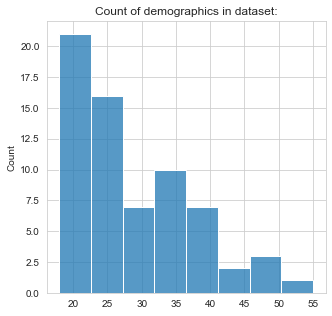

In [154]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

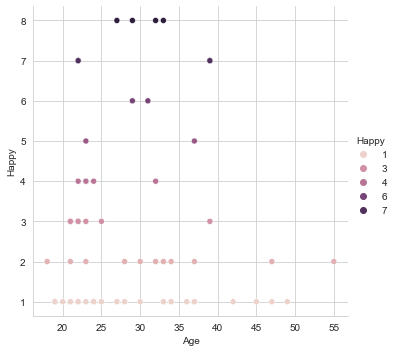

In [158]:
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Happy',hue='Happy', data=df)
plt.show();

In [140]:
#Model testing
X=df[['Age','Gender']]
y=df['Happy','Gloomy','Stressed','Relaxing','Energetic']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Indie/Acoustic', 'Indie/Acoustic', 'Pop', 'Indie/Acoustic',
       'Rock'], dtype=object)

<AxesSubplot:>

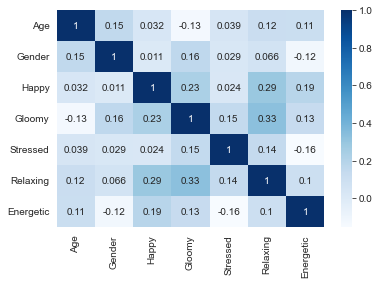

In [159]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

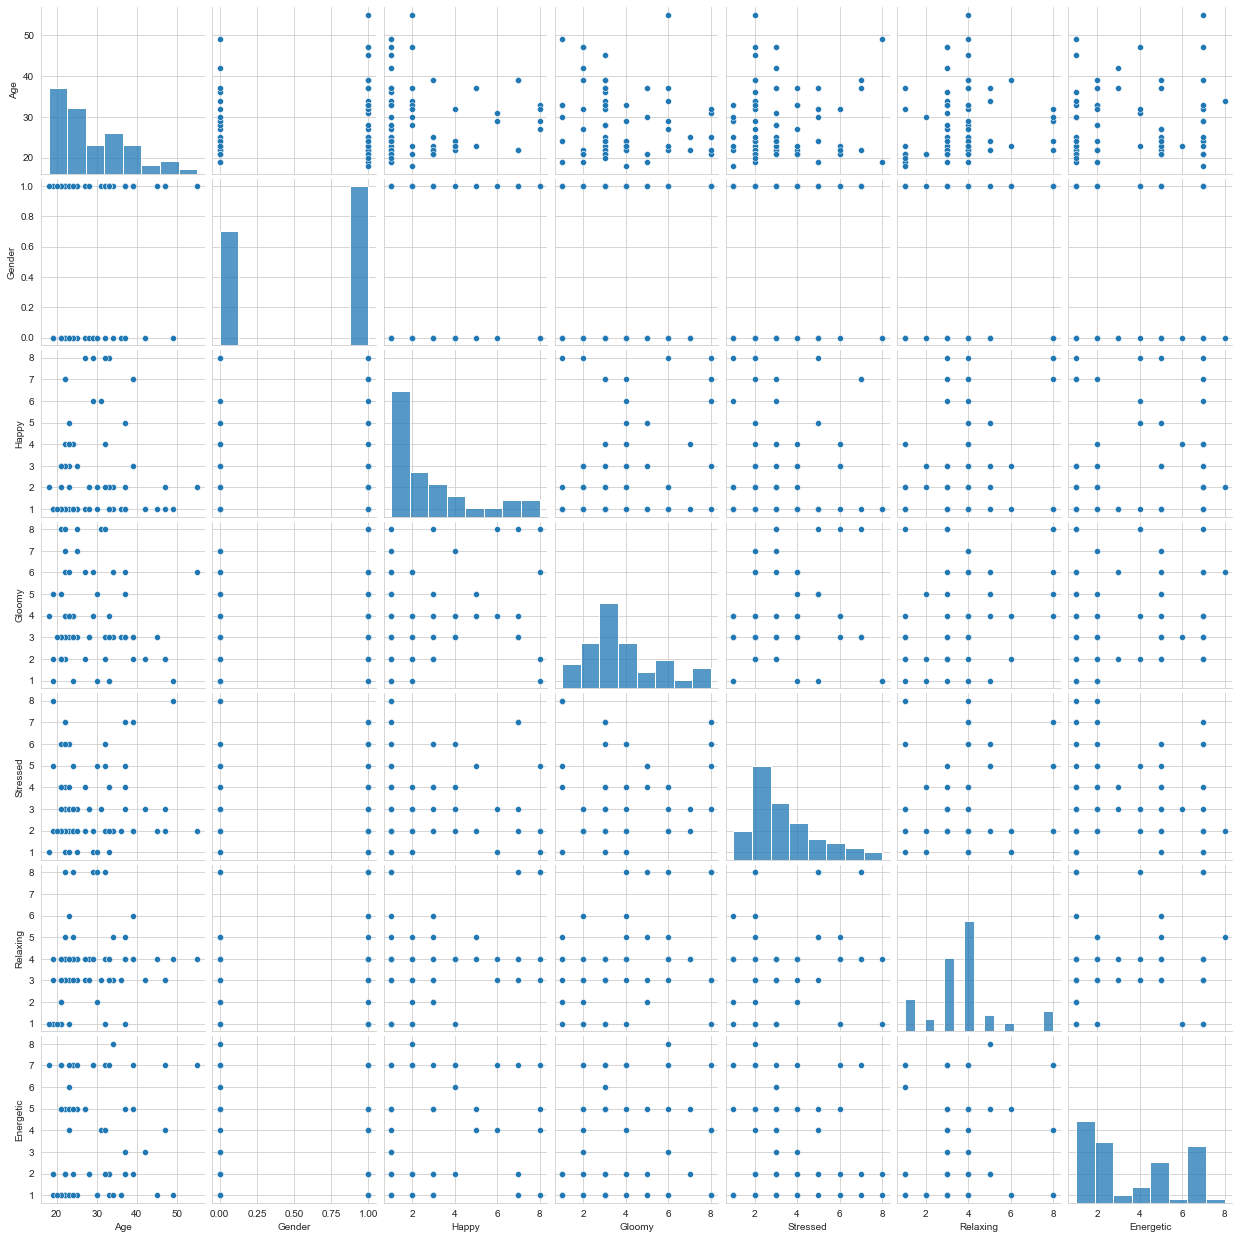

In [161]:
sns.pairplot(df)

In [163]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)

      Age  Gender  Happy  Gloomy  Stressed  Relaxing  Energetic
0   False   False  False   False     False     False      False
1   False   False  False   False     False     False      False
2   False   False  False   False     False     False      False
3   False   False  False   False     False      True      False
4   False   False  False   False     False     False      False
..    ...     ...    ...     ...       ...       ...        ...
62  False   False  False   False     False      True      False
63  False   False  False   False     False     False      False
64  False   False  False   False      True     False      False
65  False   False  False   False     False     False      False
66  False   False  False   False     False      True      False

[67 rows x 7 columns]
